<a href="https://colab.research.google.com/github/emaudealtema/Machine_Learning_repo/blob/master/Fake-News-detection-Projet_Final-Session-%C3%A9t%C3%A9-2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/fake_news_detection_dataset.csv')

#fake = pd.read_csv('/content/drive/MyDrive/Dataset/fake_news_data/Fake.csv')
#true = pd.read_csv('/content/drive/MyDrive/Dataset/fake_news_data/True.csv')

In [ ]:
#Regardons à quoi ressemble nos données

data.sample(10)

,Labels,Text,Text_Tag
3970,4,Rhode Island: 3% bigger at low tide.,tourism
4527,4,Were the only nation in the world that does no...,"homeland-security,immigration,military"
6455,1,Homosexual behavior cuts your lifeby about 20 ...,"gays-and-lesbians,health-care,sexuality"
9031,2,I vetoed more than $3 billion in spending. Law...,"economy,housing,job-accomplishments,state-budget"
1773,3,A lot of what (Cubas) survival depends on is V...,foreign-policy
5816,3,Obamacare is not a popular law.,"government-regulation,health-care,polls"
4790,5,Taxpayers earning $1 million pay an effective ...,taxes
8975,4,Ken Cuccinelli tried to shut down state govern...,"bipartisanship,state-budget"
4037,0,Two-thirds of American families rely on the mo...,"economy,poverty,women"
2970,1,The Islamic State just built a hotel in Syria.,terrorism


In [ ]:
len(data)

10240

In [ ]:
# Regardons les derniéres lignes s'elles se ressemblent
data.tail()

,Labels,Text,Text_Tag
10235,3,There are a larger number of shark attacks in ...,"animals,elections"
10236,3,Democrats have now become the party of the [At...,elections
10237,2,Says an alternative to Social Security that op...,"retirement,social-security"
10238,1,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy"
10239,4,The Department of Veterans Affairs has a manua...,"health-care,veterans"


In [ ]:
data.Labels.value_counts()

2    2114
1    1995
3    1962
5    1676
0    1654
4     839
Name: Labels, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


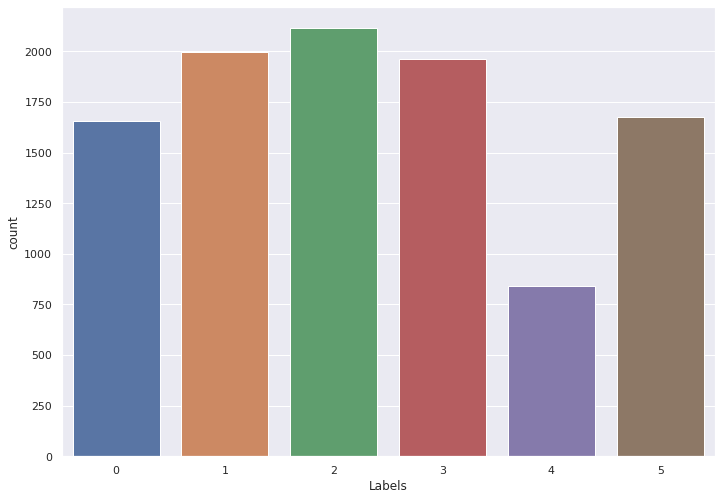

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data['Labels'])

### Si on regarde ici on verra qu'il y a
### Half-True represente par 2 ---> 2114 Documents
### False represente par 1 ---------> 1995 Documents
### Mostly-True represente par 3----> 1962 Documents
### Barely-True represente par 0 ---> 1654 Documents
### Not-Known represente par 4 -----> 839 Documents
### True represente par 5 ----------> 1676 Documents

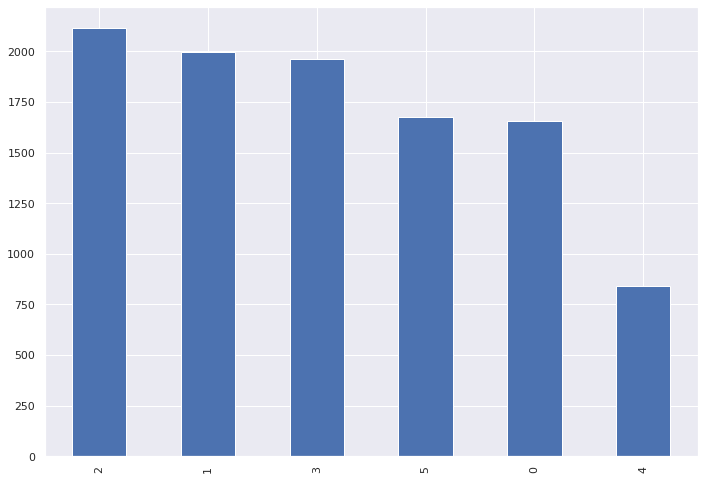

In [ ]:
_= data.Labels.value_counts().plot(kind='bar')

In [ ]:
# Regardons une ligne de nos données
data['Text'][0], 'Classe :', data['Labels'][0]

('Says the Annies List political group supports third-trimester abortions on demand.',
 'Classe :',
 1)

In [ ]:
# Une autre phrase
data['Text'][6], 'Classe :', data['Labels'][6]

('Jim Dunnam has not lived in the district he represents for years now.',
 'Classe :',
 0)

#Le word embedding d'un mot peut être récupérée en utilisant la bibliothèque spaCy.

In [ ]:
!pip3 install spacy
!python3 -m spacy download en_core_web_sm

In [ ]:
import spacy
import string

In [ ]:
nlp = spacy.load("en_core_web_sm") # chargeons le modèle en anglais en_core_web_sm

spacy_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS) # Affichons la liste des mots vides de SpaCy

punctuation = list(string.punctuation) # Affichons une liste avec ponctuations

spacy_stopwords[:10], punctuation[:10]

(['whereby',
  'us',
  'latterly',
  'rather',
  'thereafter',
  'above',
  'name',
  'beside',
  'nothing',
  '‘d'],
 ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*'])

#Étape de prétraitement des données

In [ ]:
# Création une fonction pour prétraiter nos données

def preprocess(phrase):
    
    tokens = [word.text.replace('\n', '').strip() for word in nlp(phrase) 
              if word.text.lower() not in spacy_stopwords + punctuation]
    tokens = [token for token in tokens if len(token) > 1]
    if len(tokens) > 1:
        return tokens
    return None

data['cleaned_text'] = data['Text'].apply(preprocess)

##Apres avoir pretraite les donnees en enlevant les retours en ligne les ##espaces devant et deriere, les stopwords, les ponctuations, je crée une nouvelle colonne nommee clean_text et met les donnees pretraitees

In [ ]:
data.head()

,Labels,Text,Text_Tag,cleaned_text
0,1,Says the Annies List political group supports ...,abortion,"[Says, Annies, List, political, group, support..."
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments","[decline, coal, start, started, natural, gas, ..."
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,"[Hillary, Clinton, agrees, John, McCain, votin..."
3,1,Health care reform legislation is likely to ma...,health-care,"[Health, care, reform, legislation, likely, ma..."
4,2,The economic turnaround started at the end of ...,"economy,jobs","[economic, turnaround, started, end, term]"


#verifions s'il y a des documents vides afin de les jetter

In [ ]:
data['cleaned_text'].isnull().sum()

0

In [ ]:
data['cleaned_text'][1][:10]

['decline',
 'coal',
 'start',
 'started',
 'natural',
 'gas',
 'took',
 'started',
 'begin',
 'President']

#Comme il y en a 12 documents vides on va les jetter

In [ ]:
data.dropna(subset=['cleaned_text'], inplace=True)

#faisons une petite verication

In [ ]:
data['cleaned_text'].isnull().sum()

0

verifions la longueur de notre nouvau jeu de donnee ce qui nous le nombre de documents qui y existe

In [ ]:
len(data)

10228

#Vérifions le nombre de mot de quelques document de notre jeu de donnnée

In [ ]:
data['document_length'] = data['cleaned_text'].apply(lambda tokens: len(tokens))
data['document_length']

0         9
1        14
2        11
3        10
4         5
         ..
10235     8
10236     6
10237    15
10238     7
10239    14
Name: document_length, Length: 10228, dtype: int64

In [ ]:
max(data['document_length'])

332

#le plus long mon jeu de donnees et on constate qu'il contient 332 Documents

#Ici je fais deux choses je trie les donnees dans le tableau documment_length puis j'affichishe les 5 lignes du tableau qui ont le plus petit nombre de mots

In [ ]:
data.sort_values('document_length', inplace=True)
data.head()

,Labels,Text,Text_Tag,cleaned_text,document_length
8642,5,On oil drilling,"energy,environment","[oil, drilling]",2
4728,1,The Chinese are there in Syria.,"foreign-policy,military","[Chinese, Syria]",2
298,3,Immigrants are more fertile.,immigration,"[Immigrants, fertile]",2
4868,0,Congress is on vacation.,"congress,congressional-rules","[Congress, vacation]",2
5724,0,I released all my emails.,candidates-biography,"[released, emails]",2


#Ici j'affiche les 5 dernieres lignes celle qui ont le plus grand nombre de mots

In [ ]:
data.tail()

,Labels,Text,Text_Tag,cleaned_text,document_length
9962,3,Barbara Buono by the numbers: As a Trenton pol...,"debt,state-budget,state-finances,taxes","[Barbara, Buono, numbers, Trenton, politician,...",46
2142,1,The fact is that although we have had a presid...,NaN,"[fact, president, opposed, abortion, years, ab...",54
6119,5,Georgia has the most restrictive ballot access...,crime,"[Georgia, restrictive, ballot, access, laws, c...",173
7550,1,The vast majority of the money I got was from ...,"stimulus,transportation","[vast, majority, money, got, small, donors, co...",243
1280,3,"Hospitals, doctors, MRIs, surgeries and so for...","elections,ethics,states","[Hospitals, doctors, MRIs, surgeries, forth, e...",332


#Affichons un histogramme de notre colonne qui contient les documents nettroyés

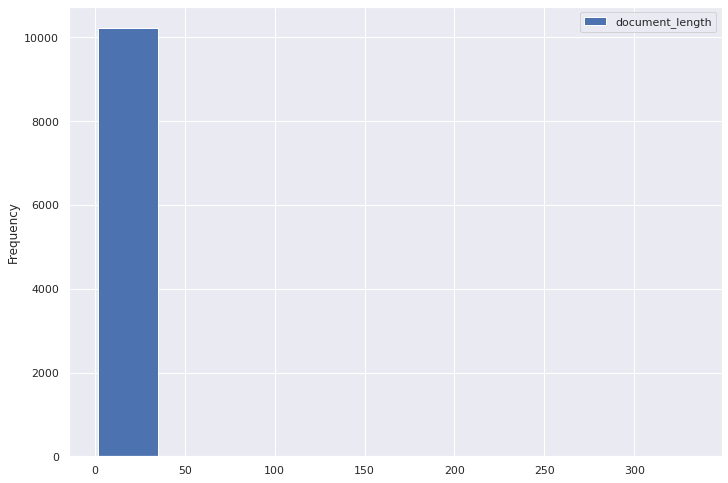

In [ ]:
_ = data.plot(y='document_length', kind='hist')

#Essayons maintenant d'extraire les trigrammes

In [ ]:
import nltk
import numpy as np

list(nltk.ngrams(np.hstack(data['cleaned_text']), 3))[:10]

[('oil', 'drilling', 'Chinese'),
 ('drilling', 'Chinese', 'Syria'),
 ('Chinese', 'Syria', 'Immigrants'),
 ('Syria', 'Immigrants', 'fertile'),
 ('Immigrants', 'fertile', 'Congress'),
 ('fertile', 'Congress', 'vacation'),
 ('Congress', 'vacation', 'released'),
 ('vacation', 'released', 'emails'),
 ('released', 'emails', 'Crime'),
 ('emails', 'Crime', 'rising')]

###Faisons maintenant la lemmatisation pour avoir la forme canonique des mots de notre baseEtant deja dans le meme environnement ou on a deja telecharge averaged_perceptron_tagger, wordnet etc on va juste les imorter et les utilisser a partir d'ici

#Faisons la lemmatisation, On dit que c'est le processus de regroupement des formes fléchies d'un mot afin qu'elles puissent être analysées comme un seul élément, identifié par le lemme du mot ou la forme du dictionnaire.

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

#Post-Tagging

In [ ]:

nltk.pos_tag(["That", "was", "a", "joke", "please", "forget", "that", "Vladimir Poutine"])

[('That', 'DT'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('joke', 'NN'),
 ('please', 'NN'),
 ('forget', 'VB'),
 ('that', 'DT'),
 ('Vladimir Poutine', 'NNP')]

#On va installer WordNet qui est une base de données lexicale des relations sémantiques entre les mots dans plus de 200 langues

In [ ]:
!python -m nltk.downloader wordnet

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
 import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
print("mom :", lemmatizer.lemmatize("mom", pos=wordnet.NOUN))
print("worst : ", lemmatizer.lemmatize("worst", pos=wordnet.ADJ))

mom : mom
worst :  bad


#La tokenisation

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Ecrivons une fonction de lemmatisation qui agit sur tout le jeu de donnee
def preprocess_with_nltk_and_lemmatisation(phrase):
    
    tokens = [lemmatizer.lemmatize(word.replace('\n', '').strip(), pos='n') for word in word_tokenize(phrase)]
    if len(tokens) > 1:
        return tokens
    return None

data['cleaned_text_nltk_and_lemmatisation'] = data['Text'].apply(preprocess_with_nltk_and_lemmatisation)

#Ecrivons une fonction qui fait la racinisation

In [ ]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

In [ ]:
print("stayed :", stemmer.stem("friendly"))
print("friends : ", stemmer.stem("laughing"))
print("gaming :", stemmer.stem("running"))

stayed : friend
friends :  laugh
gaming : run


In [ ]:
def preprocess_with_nltk_and_stemming(phrase):
    
    tokens = [stemmer.stem(word.replace('\n', '').strip()) for word in word_tokenize(phrase)]
    if len(tokens) > 1:
        return tokens
    return None

data['cleaned_text_nltk_and_stemming'] = data['Text'].apply(preprocess_with_nltk_and_stemming)

In [ ]:
data.head()

,Labels,Text,Text_Tag,cleaned_text,document_length,cleaned_text_nltk_and_lemmatisation,cleaned_text_nltk_and_stemming
8642,5,On oil drilling,"energy,environment","[oil, drilling]",2,"[On, oil, drilling]","[on, oil, drill]"
4728,1,The Chinese are there in Syria.,"foreign-policy,military","[Chinese, Syria]",2,"[The, Chinese, are, there, in, Syria, .]","[the, chines, are, there, in, syria, .]"
298,3,Immigrants are more fertile.,immigration,"[Immigrants, fertile]",2,"[Immigrants, are, more, fertile, .]","[immigr, are, more, fertil, .]"
4868,0,Congress is on vacation.,"congress,congressional-rules","[Congress, vacation]",2,"[Congress, is, on, vacation, .]","[congress, is, on, vacat, .]"
5724,0,I released all my emails.,candidates-biography,"[released, emails]",2,"[I, released, all, my, email, .]","[i, releas, all, my, email, .]"


#L’extraction d’information est l’étape qui suit le nettoyage du corpus. Pour ce faire, il nous faut changer la représentation du texte pour qu’il puisse être utilisé par un modèle statistique, et pour pouvoir l’exploiter. Utilisons Bac-of-word pour construire un vecteur de chque document de notre base à l’aide de la classe CountVectorizer de scikit-learn

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,5))
vectorizer.fit(np.hstack(data['cleaned_text'][110:130]))

X = vectorizer.transform(np.hstack(data['cleaned_text'][110:130]))

pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).T

#Faisons appel a la fonction TF-IDF de scikit-learn Pour connaître les termes qui représentent le plus un document,

#TF-IDF (Term Frequency - Inverse Document Frequency) est un algorithme pratique qui utilise la fréquence des mots pour déterminer la pertinence de ces mots par rapport à un document donné.


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(np.hstack(data['cleaned_text'])[110:130])

pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names()).T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
arab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
assault,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
banned,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
country,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
deal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
falkland,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
graduation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#On Constate qu le mot Graduation est le plus represente dans tout les documents de notre avec un score 19 fois

In [ ]:
token = nlp("graduation")
token, token.vector.shape, token.vector

(graduation,
 (96,),
 array([ 1.0413197 ,  0.60159206,  0.33495346, -1.1028017 , -0.18121803,
         0.2585441 ,  0.40614557, -0.17282628,  1.0460609 , -0.17385584,
         0.11128008, -0.7011368 ,  1.2259961 ,  0.6730344 , -0.5953181 ,
        -0.04933706,  0.33913493,  0.1498251 , -0.20983826,  0.396038  ,
         0.5644046 , -0.46068078,  0.9354014 ,  0.79900646,  0.98482835,
        -0.18336464,  0.18759346, -0.7068528 ,  0.579308  ,  0.12885141,
        -0.39397305, -0.44418132, -1.6618634 , -0.03415981, -0.98795086,
         0.46603933, -0.53413564,  0.7327786 ,  0.30594462, -0.3523773 ,
        -0.01758295,  0.19711497, -0.51484   ,  0.18764222, -0.50808465,
        -1.3728071 , -0.05978924,  0.9646126 , -0.15948677,  0.23716158,
        -0.45020112, -1.1935031 , -1.3088613 , -1.4628892 , -0.7843846 ,
        -0.6835197 , -0.9705714 , -1.1219156 , -0.1154694 ,  0.28401947,
         0.21465297, -0.9081876 , -0.03949299,  0.16708024, -0.45456845,
         0.07971686, -0.296427

# Comparaison du mot graduation avec quelques mots

In [ ]:
token = nlp('graduation')
for word in ['graduation', 'rifles', 'stop', 'support', 'independent', 'men', 'obama', 'marriage', 'island']:
    print('graduation', '~', word, ':', token.similarity(nlp(word)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


graduation ~ graduation : 1.0
graduation ~ rifles : 0.3060584268197144
graduation ~ stop : 0.3130643409529362
graduation ~ support : 0.6773129896605229
graduation ~ independent : 0.3723894951917822
graduation ~ men : 0.3057272180918735
graduation ~ obama : 0.6425889574215513
graduation ~ marriage : 0.7991579554360816
graduation ~ island : 0.7468471574565945


#Partageons nos donnees en donnees d'apprentissage et en donnees de test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Labels'], test_size=0.2)
len(X_train), len(X_test)

(8182, 2046)

#Donc apres avoir partagé le dataset on a 8182 documents pour l'entrainement et 2046 pour le test

#Ici on va entrainer plusieurs modèles deep learning et camparer les résultats




# On va appliquer et comparer ces résultats suivantes: LogisticRegression (Logistic regression), RandomForestClassifier (Random forest classifier), DecisionTreeClassifier (Decision tree classifier)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#1ème méthode qui est le svm

In [ ]:
from sklearn import svm

clf = svm.LinearSVC()

_ = clf.fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.19      0.18       308
           1       0.25      0.25      0.25       410
           2       0.24      0.26      0.25       440
           3       0.21      0.28      0.24       356
           4       0.25      0.10      0.15       173
           5       0.21      0.18      0.20       359

    accuracy                           0.22      2046
   macro avg       0.22      0.21      0.21      2046
weighted avg       0.22      0.22      0.22      2046



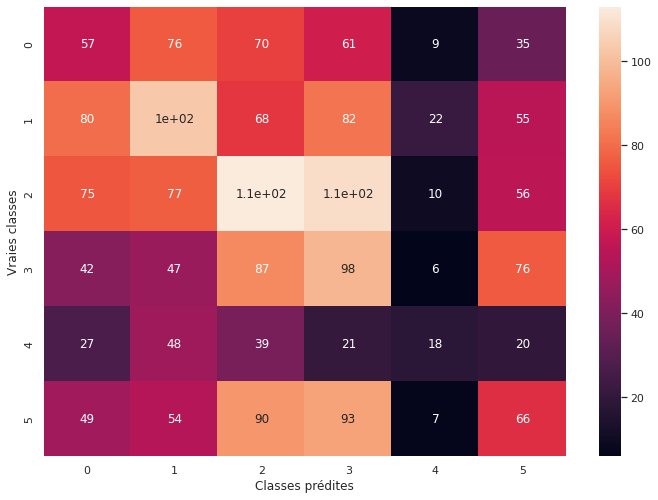

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.show()

#2ème méthode Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

_ = clf.fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.08      0.10       308
           1       0.24      0.40      0.30       410
           2       0.24      0.24      0.24       440
           3       0.20      0.31      0.24       356
           4       0.53      0.05      0.09       173
           5       0.21      0.09      0.12       359

    accuracy                           0.22      2046
   macro avg       0.26      0.20      0.18      2046
weighted avg       0.23      0.22      0.20      2046



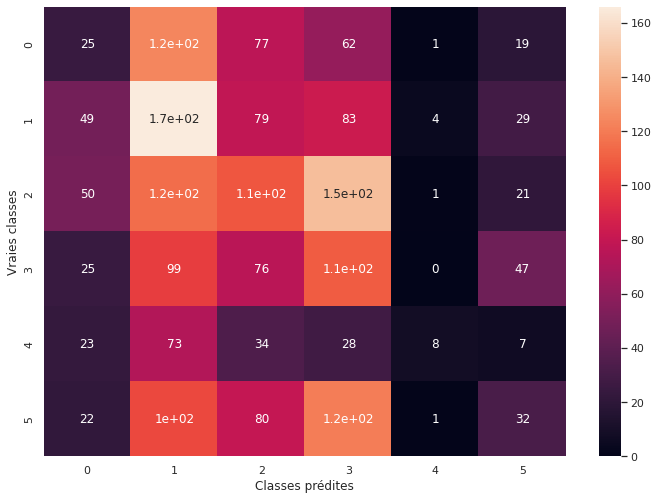

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.show()

#3ème méthode DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

_ = clf.fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.15      0.17       308
           1       0.23      0.24      0.24       410
           2       0.21      0.21      0.21       440
           3       0.20      0.23      0.21       356
           4       0.11      0.09      0.10       173
           5       0.19      0.18      0.18       359

    accuracy                           0.20      2046
   macro avg       0.19      0.19      0.19      2046
weighted avg       0.20      0.20      0.20      2046



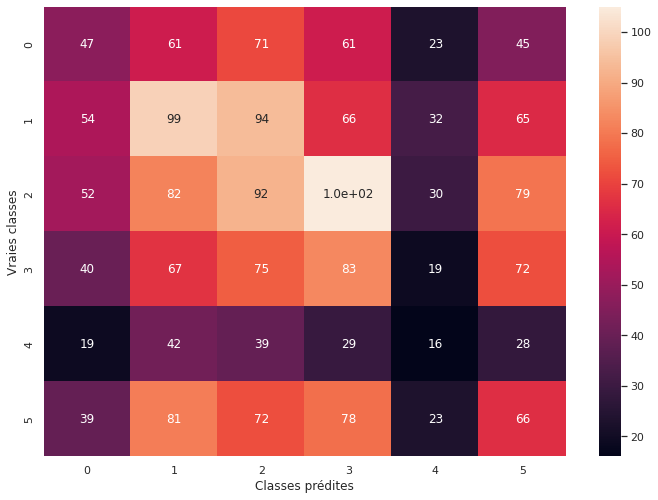

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.show()

#4ème méthode LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

_ = clf.fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.16      0.17       308
           1       0.28      0.33      0.30       410
           2       0.25      0.29      0.27       440
           3       0.22      0.35      0.27       356
           4       1.00      0.03      0.06       173
           5       0.23      0.14      0.17       359

    accuracy                           0.24      2046
   macro avg       0.36      0.22      0.21      2046
weighted avg       0.30      0.24      0.23      2046



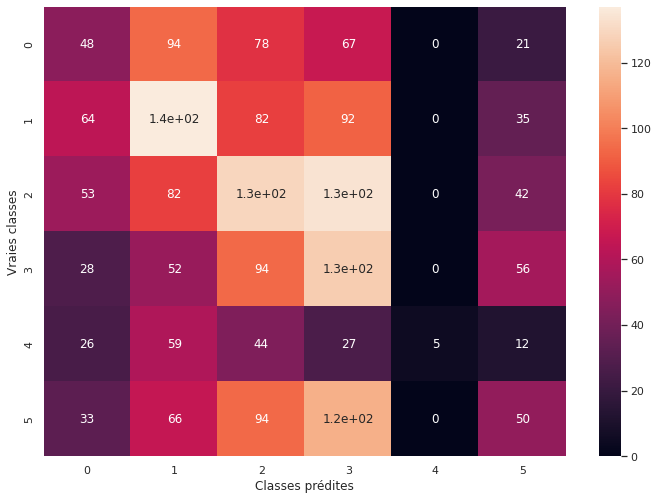

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.show()


#En conclusion apres avoir implémenté tous les 5 modèles on constate que les modeles LogisticRegression et RandomForest sont plus performants sur notre jeu de donnnées   